<a href="https://colab.research.google.com/github/WitoldSurdej/PFML/blob/master/MissingReportLab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

In [7]:
#importing data
data = pd.read_csv('https://raw.githubusercontent.com/WitoldSurdej/PFML/master/wqr.csv',sep= ';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


***Task1***

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [23]:
#preparing data for splitting, taking "quality" as dependant variable, and all the others as independant.
#using DataFrame.loc to Access a group of rows and columns by labels
X1=data.loc[:,data.columns != 'quality' ]
y=data['quality']

#nurmalizing the data for better readability
minmax_scaler = MinMaxScaler().set_output(transform="pandas")
X1_normalized = minmax_scaler.fit_transform(X1)
#X1_normalized.head()

#splitting the data into train, test, validation with proportions: 49,30,21, using random_state=42 to maintain repeatability
X_train, X_test, y_train, y_test = train_test_split(X1_normalized,y,test_size = 0.3,random_state = 42)
X_train1, X_val, y_train1, y_val = train_test_split(X_train,y_train,test_size = 0.3,random_state = 42)

#creating the regressor
lin_reg = LinearRegression()

#fitting the curve
lin_reg.fit(X_train1, y_train1)

#predicting the results on training data
y_pred_train_lin = lin_reg.predict(X_train1)

#predicting the results on validation data
y_pred_val_lin = lin_reg.predict(X_val)

#calculating RMSE for both predictions
rme_training_lin = sklearn.metrics.mean_squared_error(y_train1,y_pred_train_lin)
rme_val_lin = sklearn.metrics.mean_squared_error(y_val,y_pred_val_lin)
print(f'RMSE Train={rme_training_lin}')
print(f'RMSE Val={rme_val_lin}')

RMSE Train=0.41399613768919474
RMSE Val=0.46459500498121065


RMSE did not substantially increase on the validation dataset, which means that the regression curve was most likely properly fitted, on the other hand the RMSE is large, which indicates that the relationships between features and dependant variable are most likely non linear. Model is too simple.

***Task2***

In [32]:
# Create equal weights and then increase the weights in the area we want better performance (the last 2 data points)
sample_weight = np.ones(len(X_train1))
sample_weight[-2:] *= 30

#creating the regressor
lin_reg_weighted = LinearRegression()

#fitting the curve
lin_reg_weighted.fit(X_train1, y_train1, sample_weight)

#predicting the results on training data
y_pred_train_lin_weighted = lin_reg_weighted.predict(X_train1)

#predicting the results on validation data
y_pred_val_lin_weighted = lin_reg_weighted.predict(X_val)

#calculating RMSE for both predictions
rme_training_lin_weighted = sklearn.metrics.mean_squared_error(y_train1,y_pred_train_lin_weighted)
rme_val_lin_weighted = sklearn.metrics.mean_squared_error(y_val,y_pred_val_lin_weighted)
print(f'RMSE Train={rme_training_lin_weighted}')
print(f'RMSE Val={rme_val_lin_weighted}')

RMSE Train=0.41655685445963153
RMSE Val=0.4760399464654522


sample_weight: array-like of shape (n_samples,), default=None - Individual weights for each sample.

In our case we have assigned increased weights to the last two samples. The result is that the model becomes MORE PRECISE around them, but for more complex datasets, it can increase error in areas of our feature space.

the weights enable training a model that is more accurate for certain values of the input. We can use them to improve performance in the zones where the cost of error is higher.

***Task3***

In [34]:
from sklearn.neural_network import MLPRegressor

In [37]:
#Default MLP

#defining parameters
reg_MLP1 = MLPRegressor(random_state=1, max_iter=500)

#fitting
reg_MLP1.fit(X_train1, y_train1)

#predicting
y_pred_train_MLP1 = reg_MLP1.predict(X_train1)
y_pred_MLP1 = reg_MLP1.predict(X_val)

#calculating results and displaying them
rme_training_MLP1=sklearn.metrics.mean_squared_error(y_train1,y_pred_train_MLP1)
rme_val_MLP1=sklearn.metrics.mean_squared_error(y_val,y_pred_MLP1)
print(f'rme_training_def={rme_training_MLP1}')
print(f'rme_val_def={rme_val_MLP1}')

#Customized MLP (adjusted number of layers, solver, iterations etc)

#defining parameters
reg_MLP2 = MLPRegressor(hidden_layer_sizes=(20,10,8, 5), random_state=1,
max_iter=1000, solver='sgd',activation='relu',learning_rate='adaptive',early_stopping=True,validation_fraction=0.3)

#fitting
reg_MLP2.fit(X_train1, y_train1)

#predicting
y_pred_train_MLP2 = reg_MLP2.predict(X_train1)
y_pred_MLP2 = reg_MLP2.predict(X_val)

#calculating results and displaying them
rme_training_MLP2=sklearn.metrics.mean_squared_error(y_train1,y_pred_train_MLP2)
rme_val_MLP2=sklearn.metrics.mean_squared_error(y_val,y_pred_MLP2)
print(f'rme_training_mod={rme_training_MLP2}')
print(f'rme_val_mod={rme_val_MLP2}')

rme_training=0.40805021553509857
rme_val=0.45264827707440747
rme_training=0.4358078736080623
rme_val=0.41918626499871836


We can see that after adjustments the performance improved on validation dataset

***Lab4***

In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [41]:
#creating our polynomial features. We want to test different number of features for each of the 4 different nb of degrees
poly2 = PolynomialFeatures(degree=3, include_bias=True)

#fitting the data into a model and transforming it into a form that is more suitable for the model
poly_features = poly2.fit_transform(X1_normalized)

#splitting the data
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)
X1_train1, X1_validation, y1_train1, y1_validation = train_test_split(X_train, y_train, test_size = 0.3, random_state=42)

#creating and fitting the model
poly_reg_model = LinearRegression(fit_intercept=True)
poly_reg_model.fit(X_train, y_train)

#testing the results
poly_reg_y_predicted_training = poly_reg_model.predict(X1_train1)
poly_reg_y_predicted_validation = poly_reg_model.predict(X1_validation)
poly_reg_mse_training = mean_squared_error(y1_train1, poly_reg_y_predicted_training)
poly_reg_mse_validation = mean_squared_error(y1_validation, poly_reg_y_predicted_validation)
print(f'RMSE Train={poly_reg_mse_training}')
print(f'RMSE Val={poly_reg_mse_validation}')

RMSE Train=0.19360580710649547
RMSE Val=0.2365913877144489


Compared to Linear regression, Polynomial regression is much better at mapping non-linear spaces (thanks to higher degree variables). It can be clearly observed by comparing the RMSE for both methods. Simply increasing the degree of polynomial by 1 alowed us to decrease error by ~50%.

***Task5***

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [43]:
#performing thresholding (if quality > 5)
y_class = y.apply(lambda x: 1 if x > 5.8 else 0)

#splitting the data with modified y
X_train, X_test, y_class_train, y_class_test = train_test_split(X1_normalized,y_class,test_size = 0.3,random_state = 42)
X_train1, X_val, y_class_train1, y_class_val = train_test_split(X_train,y_class_train,test_size = 0.3,random_state = 42)

#creating logistic regression model
clf = sklearn.linear_model.LogisticRegression()

#gitting
clf.fit(X_train1,y_class_train1)

#predicting
y_class_pred_train = clf.predict(X_train1)
y_class_pred = clf.predict(X_val)

#RME
rme_training_clf=sklearn.metrics.mean_squared_error(y_class_train1,y_class_pred_train)
rme_val_clf=sklearn.metrics.mean_squared_error(y_class_val,y_class_pred)
print(f'RMSE Train={rme_training_clf}')
print(f'RMSE Val={rme_val_clf}')

#accuracy
acc_train_clf = accuracy_score(y_class_train1, y_class_pred_train)
acc_val_clf = accuracy_score(y_class_val, y_class_pred)
print(f'acc_train_clf={acc_train_clf}')
print(f'acc_val_clf={acc_val_clf}')

RMSE Train=0.25287356321839083
RMSE Val=0.23511904761904762
acc_train_clf=0.7471264367816092
acc_val_clf=0.7648809523809523


***Task6***

In [47]:
#selecting the wanted features
selected_columns=['alcohol', 'volatile acidity', 'total sulfur dioxide', 'sulphates']
selected_columns2=['pH', 'free sulfur dioxide', 'residual sugar', 'fixed acidity']

#choosing selected columns, and saving them into a new dataset
X2=X1_normalized[selected_columns]
X3=X1_normalized[selected_columns2]

#checking if everything is ok
#X2.head()
#X3.head()

#splitting the data into train/test
X2_train, X2_test, y2_class_train, y2_test = train_test_split(X2,y_class,test_size = 0.3,random_state = 42)
X3_train, X3_test, y3_class_train, y3_test = train_test_split(X3,y_class,test_size = 0.3,random_state = 42)

#creating regression models
clf2 = sklearn.linear_model.LogisticRegression()
clf3 = sklearn.linear_model.LogisticRegression()

#fitting
clf2.fit(X2_train,y2_class_train)
clf3.fit(X3_train,y3_class_train)

#predicting
y2_class_pred_train = clf2.predict(X2_train)
y2_class_pred_test = clf2.predict(X2_test)
y3_class_pred_train = clf3.predict(X3_train)
y3_class_pred_test = clf3.predict(X3_test)

#checking accuracy
acc_train_clf2 = accuracy_score(y2_class_train, y2_class_pred_train)
acc_test_clf2 = accuracy_score(y2_test, y2_class_pred_test)
acc_train_clf3 = accuracy_score(y3_class_train, y3_class_pred_train)
acc_test_clf3 = accuracy_score(y3_test, y3_class_pred_test)
print(f'acc_train_clf2= {acc_train_clf2}')
print(f'acc_test_clf2= {acc_test_clf2}')
print(f'acc_train_clf3= {acc_train_clf3}')
print(f'acc_test_clf3= {acc_test_clf3}')

acc_train_clf2= 0.7542448614834674
acc_test_clf2= 0.7125
acc_train_clf3= 0.5576407506702413
acc_test_clf3= 0.575


The 1st feature set allows us to obtain significantly (~20%) higher accuracy

***Task7***

In [ ]:
from sklearn.svm import SVC

In [51]:
#splitting the data
X_svm_train, X_svm_test, y_svm_train, y_svm_test = train_test_split(X1_normalized,y,test_size = 0.3,random_state = 42)

#creating SVM classifiers with different kernels
svm_classifier = sklearn.svm.SVC(kernel='linear')
svm_classifier2 = sklearn.svm.SVC(kernel='poly')

#training the classifiers
svm_classifier.fit(X_svm_train, y_svm_train)
svm_classifier2.fit(X_svm_train, y_svm_train)

#predicting
y_pred_train = svm_classifier.predict(X_svm_train)
y_pred_test = svm_classifier.predict(X_svm_test)
y_pred_train2 = svm_classifier.predict(X_svm_train)
y_pred_test2 = svm_classifier.predict(X_svm_test)

#checking accuracy
acc_train_svm = accuracy_score(y_svm_train, y_pred_train)
acc_test_svm = accuracy_score(y_svm_test, y_pred_test)
acc_train_svm2 = accuracy_score(y_svm_train, y_pred_train2)
acc_test_svm2 = accuracy_score(y_svm_test, y_pred_test2)
print(f'y_pred_train  {acc_train_svm}')
print(f'y_pred_test  {acc_test_svm}')
print(f'y_pred_train2  {acc_train_svm2}')
print(f'y_pred_test2  {acc_test_svm2}')

y_pred_train  0.5969615728328865
y_pred_test  0.5520833333333334
y_pred_train2  0.5969615728328865
y_pred_test2  0.5520833333333334


The choice of a correct kernel parameter may significantly impact its ability to classify data. For example, linear will work well for linearly separable data, but if it isn't linearly separable the same choice will result in very poor performance

***Task8***

In [52]:
from sklearn.neural_network import MLPClassifier

In [61]:
# Creating the MLP classifier with custom parameters
MLP3 = MLPClassifier(hidden_layer_sizes=(64, 64), activation='relu', solver='adam', alpha=0.0001,
                    batch_size='auto', learning_rate='constant', learning_rate_init=0.01,
                    max_iter=500, random_state=42)

#splitting the data into train, test, validation with proportions: 49,30,21, using random_state=42 to maintain repeatability
X_train, X_test, y_train, y_test = train_test_split(X1_normalized,y,test_size = 0.3,random_state = 42)
X_train1, X_val, y_train1, y_val = train_test_split(X_train,y_train,test_size = 0.3,random_state = 42)

# Training the MLP classifier
MLP3.fit(X_train1, y_train1)

# Making predictions
y_pred_train_MLP3 = MLP3.predict(X_train1)
y_pred_test_MLP3 = MLP3.predict(X_test)

# Calculating accuracy
acc_train_MLP3 = accuracy_score(y_train1, y_pred_train_MLP3)
acc_test_MLP3 = accuracy_score(y_test, y_pred_test_MLP3)
print(f"Accuracy train: {acc_train_MLP3}")
print(f"Accuracy train: {acc_test_MLP3}")

Accuracy train: 0.7509578544061303
Accuracy train: 0.5833333333333334


***Task9***

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
# Creating the KNN classifier
knn = KNeighborsClassifier(n_neighbors=2, weights='uniform', algorithm='auto', p=2)

# Training the KNN classifier
knn.fit(X_train1, y_train1)

# Making predictions on the test set
y_pred_train_KNN = knn.predict(X_train1)
y_pred_test_KNN = knn.predict(X_test)

# Calculating accuracy
acc_train_KNN = accuracy_score(y_train1, y_pred_train_KNN)
acc_test_KNN = accuracy_score(y_test, y_pred_test_KNN)
print(f"Accuracy train: {acc_train_KNN}")
print(f"Accuracy train: {acc_test_KNN}")

Accuracy train: 0.8058748403575989
Accuracy train: 0.5708333333333333


***Task10***

In [82]:
#modifying parameters

In [92]:
weights=['uniform', 'distance']


acc_train_saved_in_each_iter = [[[0 for _ in range(30)] for _ in range(len(weights))] for _ in range(10)]
acc_test_saved_in_each_iter = [[[0 for _ in range(30)] for _ in range(len(weights))] for _ in range(10)]
for i in range(10):
  for j in range(len(weights)):
    for k in range(30):
      # Creating the KNN classifier
      knn = KNeighborsClassifier(n_neighbors=i+2, weights=weights[j], algorithm='auto', leaf_size=k+10, p=2)

      # Training the KNN classifier
      knn.fit(X_train1, y_train1)

      # Making predictions on the test set
      y_pred_train_KNN = knn.predict(X_train1)
      y_pred_test_KNN = knn.predict(X_test)

      # Calculating accuracy
      acc_train_KNN = accuracy_score(y_train1, y_pred_train_KNN)
      acc_test_KNN = accuracy_score(y_test, y_pred_test_KNN)
      acc_train_saved_in_each_iter[i][j][k]=acc_train_KNN
      acc_test_saved_in_each_iter[i][j][k]=acc_test_KNN

The for loop iterates through values of n_neighbours, leaf_size and weights and saves the accuracy of each configuration. We can now check which configuration had the best performance.

In [93]:
#finding idexes of the min and max

#converting to NumPy array
acc_train_saved_in_each_iter_num = np.array(acc_train_saved_in_each_iter)
acc_test_saved_in_each_iter_num = np.array(acc_test_saved_in_each_iter)

min_index_train = np.unravel_index(np.argmin(acc_train_saved_in_each_iter_num), acc_train_saved_in_each_iter_num.shape)
max_index_train = np.unravel_index(np.argmax(acc_train_saved_in_each_iter_num), acc_train_saved_in_each_iter_num.shape)

min_index_test = np.unravel_index(np.argmin(acc_test_saved_in_each_iter_num), acc_test_saved_in_each_iter_num.shape)
max_index_test = np.unravel_index(np.argmax(acc_test_saved_in_each_iter_num), acc_test_saved_in_each_iter_num.shape)

print('Min train: ', min_index_train)
print('Max train: ', max_index_train)
print('Min test: ', min_index_test)
print('Max test: ', max_index_test)

Min train:  (9, 0, 0)
Max train:  (0, 1, 0)
Min test:  (1, 0, 0)
Max test:  (3, 1, 0)


In [109]:
#best accuracy training
acc_train_saved_in_each_iter_num[2][0][5]

0.7241379310344828

In [112]:
#best accuracy testing
acc_train_saved_in_each_iter_num[2][0][5]

0.7241379310344828

Best performance on the training dataset was obtained using distance weights with leaf size 11 and n=2

Best performance on the testing dataset was obtained using distance weights with leaf size 11 and n=5

***Task11***

I'm choosing MLP classifier

In [113]:
# Creating the MLP classifier with custom parameters
MLP3 = MLPClassifier(hidden_layer_sizes=(64, 64), activation='relu', solver='adam', alpha=0.0001,
                    batch_size='auto', learning_rate='constant', learning_rate_init=0.01,
                    max_iter=500, random_state=42)

#splitting the data into train, test, validation with proportions: 49,30,21, using random_state=42 to maintain repeatability
X_train, X_test, y_train, y_test = train_test_split(X1_normalized,y,test_size = 0.3,random_state = 42)
X_train1, X_val, y_train1, y_val = train_test_split(X_train,y_train,test_size = 0.3,random_state = 42)

# Retraining the MLP on combined training and test data
X_train_combined = np.concatenate((X_train1, X_test))
y_train_combined = np.concatenate((y_train1, y_test))
MLP3.fit(X_train_combined, y_train_combined)

# Making predictions
y_pred_val_MLP3 = MLP3.predict(X_val)

# Calculating accuracy
acc_val_MLP3 = accuracy_score(y_val, y_pred_val_MLP3)
print(f"Accuracy val: {acc_val_MLP3}")

Accuracy val: 0.5625


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


The performance on the validation dataset after training on both training and testing dataset is similar to the performance on training dataset.

However, using this approach (combining training and testing) can lead to overfitting as the model might become overly tailored to the specific characteristics of the combined sets.

***Task12***

In [115]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [128]:


# Splitting the data into train and test sets

# Create a pipeline with scaler and MLP classifier
clf = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(max_iter=1000, solver='sgd'))
])

# Modify parameters of MLPClassifier within the pipeline
clf.set_params(mlp__hidden_layer_sizes=(128, 64), mlp__activation='relu', mlp__alpha=0.1)

# Fit the pipeline on the training data
clf.fit(X_train1, y_train1)
clf2=clf[-1:].fit(X_train1, y_train1)
# Predict on the test set
y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)
# Calculate accuracy
acc_pip_sc = accuracy_score(y_test, y_pred)
acc_pip_no_sc = accuracy_score(y_test, y_pred)
print(f"Accuracy without feature scaling: {acc_pip_no_sc}")
print(f"Accuracy with feature scaling: {acc_pip_sc}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy without feature scaling: 0.46875
Accuracy with feature scaling: 0.46875


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


***Task14***

In [133]:
#preparing data for splitting, taking "quality" as dependant variable, and all the others as independant.
#using DataFrame.loc to Access a group of rows and columns by labels
X1=data.loc[:,data.columns != 'pH' ]
y=data['pH']

#nurmalizing the data for better readability
minmax_scaler = MinMaxScaler().set_output(transform="pandas")
X1_normalized = minmax_scaler.fit_transform(X1)
#X1_normalized.head()

#splitting the data into train, test, validation with proportions: 49,30,21, using random_state=42 to maintain repeatability
X_train, X_test, y_train, y_test = train_test_split(X1_normalized,y,test_size = 0.3,random_state = 42)
X_train1, X_val, y_train1, y_val = train_test_split(X_train,y_train,test_size = 0.3,random_state = 42)

#LR

#creating the regressor
lin_reg = LinearRegression()

#fitting the curve
lin_reg.fit(X_train1, y_train1)

#predicting the results on training data
y_pred_train_lin = lin_reg.predict(X_train1)

#predicting the results on validation data
y_pred_val_lin = lin_reg.predict(X_val)

#calculating RMSE for both predictions
rme_training_lin = sklearn.metrics.mean_squared_error(y_train1,y_pred_train_lin)
rme_val_lin = sklearn.metrics.mean_squared_error(y_val,y_pred_val_lin)
print(f'RMSE Train LR={rme_training_lin}')
print(f'RMSE Val LR={rme_val_lin}')

#NN

#defining parameters
reg_MLP2 = MLPRegressor(hidden_layer_sizes=(128,64), random_state=1,
max_iter=2000, solver='sgd',activation='relu',learning_rate='adaptive',early_stopping=True,validation_fraction=0.3)

#fitting
reg_MLP2.fit(X_train1, y_train1)

#predicting
y_pred_train_MLP2 = reg_MLP2.predict(X_train1)
y_pred_MLP2 = reg_MLP2.predict(X_val)

#calculating results and displaying them
rme_training_MLP2=sklearn.metrics.mean_squared_error(y_train1,y_pred_train_MLP2)
rme_val_MLP2=sklearn.metrics.mean_squared_error(y_val,y_pred_MLP2)
print(f'rme_training_mod={rme_training_MLP2}')
print(f'rme_val_mod={rme_val_MLP2}')

RMSE Train LR=0.007564081390161589
RMSE Val LR=0.0069734135884691895
rme_training_mod=0.00881837772977843
rme_val_mod=0.008733378019591294


From the results it is clear, that the pH has low correlation with majority of the independent features. The feature space is most likely very difficult to optimize.



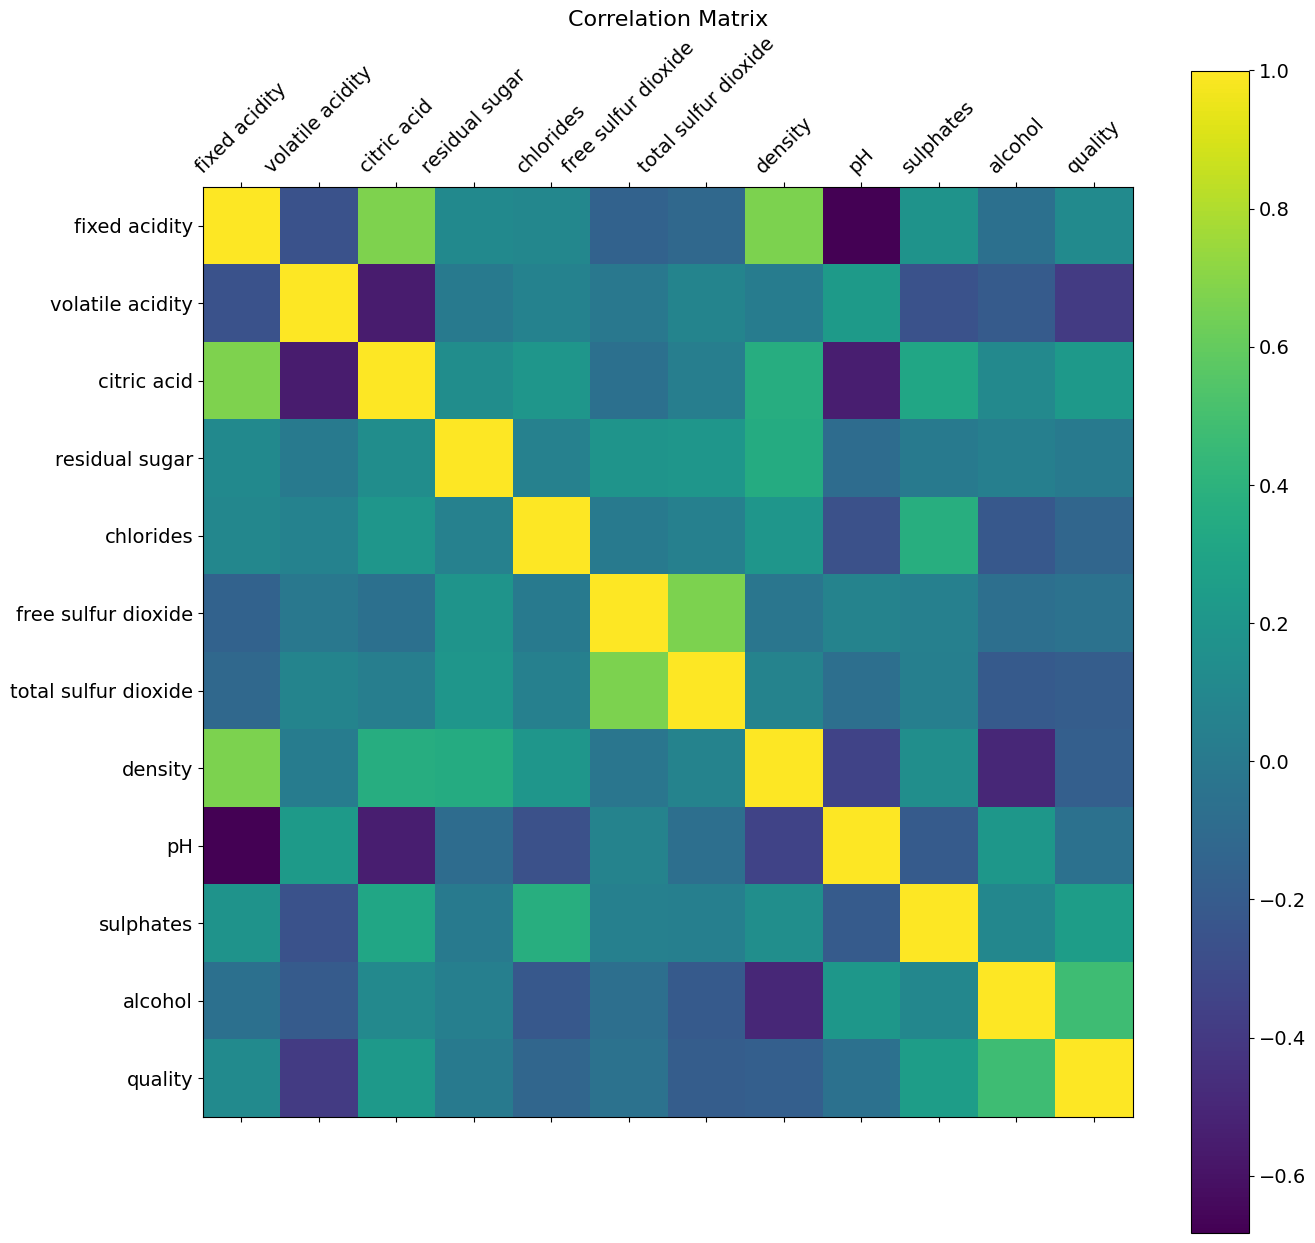

In [139]:
f = plt.figure(figsize=(15, 15))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);